## Imports

In [19]:
# !pip install lazypredict
# !pip install lightgbm

In [20]:
import pandas as pd 
import numpy as np
import sklearn
import pickle
import matplotlib.pyplot as plt
import lazypredict

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier
import lightgbm as lgb

# Try training using 139 features

In [12]:
# Load X_train
with open('X_train_139.npy', 'rb') as f:
    X_train = np.load(f)
print(X_train.shape)
X_train

(9000, 417)


array([[-0.767342, -0.826   , -0.819415, ...,  7.796718,  7.776966,
         7.876924],
       [-1.105523, -1.020528, -0.965462, ...,  9.086594,  9.029732,
         8.874108],
       [-0.226252, -0.229245, -0.232836, ...,  7.251439,  7.259818,
         7.328053],
       ...,
       [ 0.821211,  0.562039,  0.484227, ...,  8.597578,  8.637681,
         9.003994],
       [ 0.604536,  0.350152,  0.344166, ...,  6.500856,  6.757634,
         7.347805],
       [-0.60274 , -0.545279, -0.478242, ...,  7.693767,  7.503428,
         7.226299]])

In [13]:
# Load y_train
with open('y_train_139.npy', 'rb') as f:
    y_train = np.load(f)
y_train.shape
y_train

array([ 7, 13,  6, ...,  3,  3, 18], dtype=int64)

In [21]:
with open('X_test_139.npy', 'rb') as f:
    X_test = np.load(f)
print(X_test.shape)
X_test

(5000, 417)


array([[-0.320224, -0.228646, -0.15682 , ...,  8.753201,  8.729259,
         8.35337 ],
       [-0.654216, -0.359729, -0.310648, ...,  7.900267,  7.829638,
         7.791331],
       [-0.563835, -0.569221, -0.526724, ...,  8.887277,  8.819042,
         8.775348],
       ...,
       [ 0.283713,  0.331597,  0.438737, ...,  7.186795,  7.174225,
         7.202357],
       [-1.40779 , -1.360505, -1.316212, ...,  8.737639,  8.888473,
         8.959103],
       [-0.0413  ,  0.180164,  0.155025, ...,  7.959524,  7.982268,
         8.090606]])

In [14]:
# Create validation data
# Train/test sets
X_train_from_train, X_val_from_train, y_train_from_train, y_val_from_train = train_test_split(
    X_train, y_train, test_size=0.222, random_state=42, shuffle=False
)

### Extra Trees Classifier

In [15]:
# Fit/predict
etc = ExtraTreesClassifier()
_ = etc.fit(X_train_from_train, y_train_from_train)
y_pred_from_train = etc.predict(X_val_from_train)

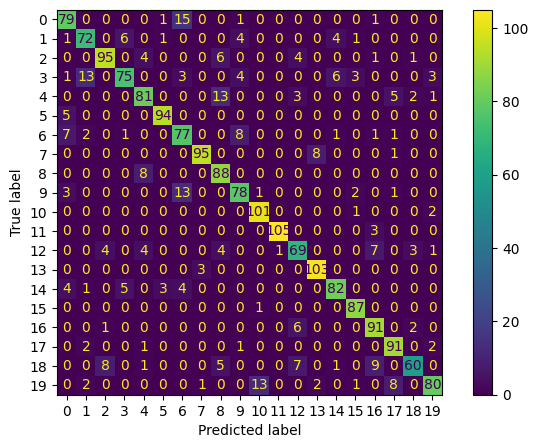

In [16]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_val_from_train, y_pred_from_train))
cmp.plot(ax=ax)
plt.show()

In [17]:
accuracy_score(y_val_from_train, y_pred_from_train)

0.8523523523523524

# Try training using 9 features

In [25]:
# Load X_train
with open('X_train_9.npy', 'rb') as f:
    X_train = np.load(f)
print(X_train.shape)
X_train

(9000, 9)


array([[ 1.59010940e-01,  5.44393051e-01,  2.96363794e-01, ...,
         8.13342643e+00,  4.42429811e-01,  1.95744138e-01],
       [ 1.74547752e-01,  6.17015065e-01,  3.80707590e-01, ...,
         8.72946826e+00,  3.86236664e-01,  1.49178761e-01],
       [-1.61696002e+00,  8.51122136e-01,  7.24408891e-01, ...,
         8.03634944e+00,  4.18813963e-01,  1.75405135e-01],
       ...,
       [-4.06112460e-01,  6.55641942e-01,  4.29866356e-01, ...,
         8.77203979e+00,  5.35075014e-01,  2.86305270e-01],
       [ 8.15228667e-03,  6.80594980e-01,  4.63209527e-01, ...,
         8.48209796e+00,  8.69155016e-01,  7.55430442e-01],
       [-5.17633651e-01,  5.38173469e-01,  2.89630682e-01, ...,
         7.45196084e+00,  3.49370740e-01,  1.22059914e-01]])

In [26]:
# Load y_train -> for prediction
with open('y_train.npy', 'rb') as f:
    y_train = np.load(f)
y_train.shape
y_train

array([ 7, 13,  6, ...,  3,  3, 18], dtype=int64)

In [ ]:
# Load X_test
with open('X_test_9.npy', 'rb') as f:
    X_test = np.load(f)
print(X_test.shape)
X_test

In [28]:
# Create validation data
# Train/test sets
X_train_from_train, X_val_from_train, y_train_from_train, y_val_from_train = train_test_split(
    X_train, y_train, test_size=0.222, random_state=42, shuffle=False
)

## Extra Trees Classifier

In [32]:
# Fit/predict
etc = ExtraTreesClassifier(n_estimators=1000, random_state=0)
_ = etc.fit(X_train_from_train, y_train_from_train)
y_pred_from_train = etc.predict(X_val_from_train)

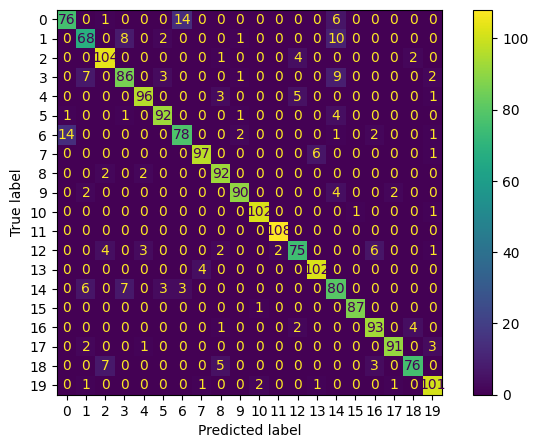

In [33]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_val_from_train, y_pred_from_train))
cmp.plot(ax=ax)
plt.show()

In [34]:
accuracy_score(y_val_from_train, y_pred_from_train)

0.8978978978978979

### Make Submission

In [136]:
preds = etc.predict(X_test)

In [137]:
print(preds.shape)
preds

(5000,)


array([ 3,  4,  5, ..., 18,  5,  1])

In [138]:
# Read labels
with open('test_labels_sorted.npy', 'rb') as f:
    test_labels = np.load(f)
len(test_labels)

5000

In [139]:
def make_submission(test_labels, preds):
    assert len(preds) == 5000
    
    submission = pd.DataFrame(columns=['id', 'class'])
    for label, pred in zip(test_labels, preds):
        submission = submission.append({'id': label, 'class': pred}, ignore_index=True)
    return submission

In [140]:
submission = make_submission(test_labels, y_pred)
submission

,id,class
0,10001,3
1,10002,10
2,10004,5
3,10008,20
4,10009,5
...,...,...
4995,23986,9
4996,23991,12
4997,23992,18
4998,23998,5


In [141]:
submission.to_csv('submission_9f_etc_1000.csv', index=False)

# Try training using 15 features

In [42]:
# Load X_train
with open('X_train_15.npy', 'rb') as f:
    X_train = np.load(f)
print(X_train.shape)
X_train

(9000, 15)


array([[ 1.59010940e-01,  5.44393051e-01,  2.96363794e-01, ...,
         1.95744138e-01,  6.51402400e+00,  9.69951000e+00],
       [ 1.74547752e-01,  6.17015065e-01,  3.80707590e-01, ...,
         1.49178761e-01,  7.63271500e+00,  9.89703100e+00],
       [-1.61696002e+00,  8.51122136e-01,  7.24408891e-01, ...,
         1.75405135e-01,  7.25143900e+00,  9.76475100e+00],
       ...,
       [-4.06112460e-01,  6.55641942e-01,  4.29866356e-01, ...,
         2.86305270e-01,  7.59620300e+00,  1.02860890e+01],
       [ 8.15228667e-03,  6.80594980e-01,  4.63209527e-01, ...,
         7.55430442e-01,  6.50085600e+00,  1.11833160e+01],
       [-5.17633651e-01,  5.38173469e-01,  2.89630682e-01, ...,
         1.22059914e-01,  6.73848100e+00,  8.35995400e+00]])

In [43]:
# Load y_train -> for prediction
with open('y_train.npy', 'rb') as f:
    y_train = np.load(f)
y_train.shape
y_train

array([ 7, 13,  6, ...,  3,  3, 18], dtype=int64)

In [44]:
# Create validation data
# Train/test sets
X_train_from_train, X_val_from_train, y_train_from_train, y_val_from_train = train_test_split(
    X_train, y_train, test_size=0.15, random_state=42, shuffle=False
)

In [45]:
# Lazy Classifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_from_train, X_val_from_train, y_train_from_train, y_val_from_train)
models

100%|██████████| 29/29 [00:16<00:00,  1.74it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.94,0.94,None,0.94,1.86
ExtraTreesClassifier,0.92,0.92,None,0.92,0.51
RandomForestClassifier,0.91,0.91,None,0.91,1.88
LabelSpreading,0.89,0.89,None,0.89,1.86
LabelPropagation,0.89,0.89,None,0.89,1.43
QuadraticDiscriminantAnalysis,0.88,0.88,None,0.88,0.02
SVC,0.88,0.88,None,0.88,0.58
BaggingClassifier,0.88,0.88,None,0.88,0.83
LogisticRegression,0.87,0.87,None,0.87,0.24


### ExtraTreesClassifier

In [46]:
# Fit/predict
etc = ExtraTreesClassifier(n_estimators=1000, random_state=0)
_ = etc.fit(X_train_from_train, y_train_from_train)
y_pred_from_train = etc.predict(X_val_from_train)

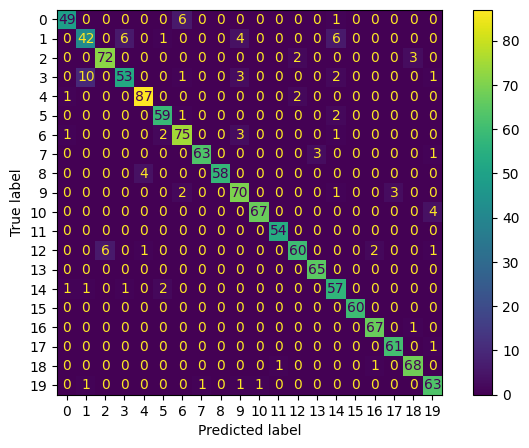

In [47]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_val_from_train, y_pred_from_train))
cmp.plot(ax=ax)
plt.show()

In [41]:
accuracy_score(y_val_from_train, y_pred_from_train)

0.9318518518518518